In [1]:
import cudf
import nvtabular as nvt
import numpy as np
from matplotlib import pyplot as plt

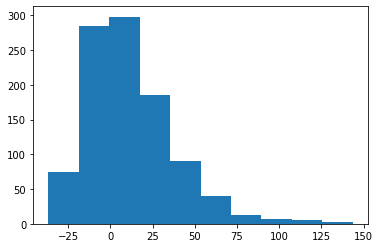

In [2]:
# simulate long-tailed data

X = np.random.gumbel(scale=20, size=1000)

plt.hist(X);

In [3]:
gdf = cudf.DataFrame(data={'measurements': X})
gdf.head()

,measurements
0,3.491616
1,-6.044252
2,-22.933016
3,21.589743
4,-10.982338


In [4]:
# let's remove negative values

gdf.measurements -= gdf.measurements.min()

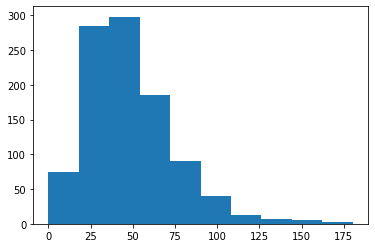

In [5]:
plt.hist(gdf.measurements.values.get());

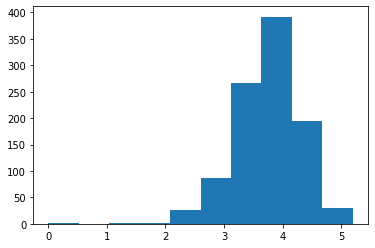

In [6]:
# addressing skew and feature scale using LogOp

after_LogOp = ['measurements'] >> nvt.ops.LogOp()

ds = nvt.Dataset(gdf)
wf = nvt.Workflow(after_LogOp)

plt.hist(wf.fit_transform(ds).compute());